<a href="https://colab.research.google.com/github/GoetheUniCV/cvproject/blob/main/models/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup



##1.1 Python Environment
In Colab, all required packages are preinstalled and only need to be imported.

In [5]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19

#from keras.preprocessing import image

from google.colab import drive

from datetime import datetime

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


##1.2 Drive Structure and Data
###1.2.1 Google Drive
Create the following directory structure in your Drive:
```
MyDrive
└── cvproject
    ├── COVID-10 Radiography Database
    │   ├── COVID-19
    │   ├── NORMAL
    │   └── Viral Pneumonia
    └── training_results

```
###1.2.2 Upload COVID-19 Dataset
The directory _COVID-10 Radiography Database_ must contain the dataset from Kaggle (https://www.kaggle.com/tawsifurrahman/covid19-radiography-database).

___

In [6]:
# This mounts your Google Drive to the Colab VM.
drive.mount('/content/drive', force_remount=True)

# Foldername in your Drive where you have saved the COVID-19 data.
PROJECT_PATH = '/content/drive/MyDrive/Semestermaterial/Master/1.Semester_Master/CV/CV_Projekt/cvproject-main'
DATABASE_PATH = f'{PROJECT_PATH}/COVID-19 Radiography Database'
#MODELS_PATH = f'{PROJECT_PATH}/models'

#assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
#sys.path.append(FOLDERPATH)

Mounted at /content/drive


In [7]:
# Check if database is complete.
try:
  if len(os.listdir(f'{DATABASE_PATH}/COVID-19')) == 1143:
    print('COVID-19 complete.')
  else:
    print('COVID-19 incomplete.')

  if len(os.listdir(f'{DATABASE_PATH}/NORMAL')) == 1341:
    print('NORMAL complete.')
  else:
    print('NORMAL incomplete.')

  if len(os.listdir(f'{DATABASE_PATH}/Viral Pneumonia')) == 1345:
    print('Viral Pneumonia complete.')
  else:
    print('Viral Pneumonia incomplete.')
except FileNotFoundError:
  print("Warning: Some directories are missing!")



COVID-19 complete.
NORMAL complete.
Viral Pneumonia complete.


In [8]:
# Show label name and its encoded value:
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]

for i, class_name in enumerate(class_names):
    print(f'{class_name}: {i}')

COVID-19: 0
NORMAL: 1
Viral Pneumonia: 2


## 1.3 Split Data

In [9]:
# NOTE: Bildgröße aller Bilder wird auf 244 x 244 geändert. Leider sind die
#       Covid Bilder sehr klein. Normale und Lungenentzündung sind 1024 x 1024.

# NOTE: removed '= defect_tree ='

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATABASE_PATH,
    labels="inferred",
    label_mode="int",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATABASE_PATH,
    labels="inferred",
    label_mode="int",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 3829 files belonging to 3 classes.
Using 3064 files for training.
Found 3829 files belonging to 3 classes.
Using 765 files for validation.


##1.4 Define Model Architecture

In [90]:
# Define data augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  #layers.experimental.preprocessing.RandomRotation(0.2),
])
#https://www.tensorflow.org/tutorials/images/data_augmentation

In [91]:
# Defining the CNN.
model_1 = tf.keras.models.Sequential([
  layers.Conv2D(64, 5, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

model_2 = tf.keras.models.Sequential([ # Luis
  layers.Conv2D(64, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

model_3 = tf.keras.models.Sequential([
  layers.Conv2D(128, 3, activation='relu'), # number of filters, kernel size
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])


model_4 = tf.keras.models.Sequential([
  layers.Conv2D(128, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

model_5 = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

model_6 = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

model_7 = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(3, activation= 'softmax')
])

model_8 = tf.keras.models.Sequential([
  data_augmentation,
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(3, activation= 'softmax')
])

model_9 = tf.keras.models.Sequential([
  data_augmentation,
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # filters, kernel size
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(3, activation= 'softmax')
])

model = model_1

#2. Model Training

In [92]:
# Avoid overfitting, strop training if model stopped improving...
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

# Compile the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model.
history=model.fit(train_data,
                  validation_data=test_data,
                  batch_size=32,epochs = 25,
                  callbacks=[early_stop])

#https://www.programiz.com/python-programming/datetime/current-time
now = datetime.now()
current_time = now.strftime("%d-%m-%Y_%H-%M-%S")

Epoch 1/25
96/96 [==============================] - 60s 585ms/step - loss: 4801.8613 - accuracy: 0.6144 - val_loss: 0.8687 - val_accuracy: 0.8928
Epoch 2/25
96/96 [==============================] - 59s 585ms/step - loss: 0.5984 - accuracy: 0.9381 - val_loss: 1.1944 - val_accuracy: 0.8967
Epoch 3/25
96/96 [==============================] - 59s 580ms/step - loss: 0.2291 - accuracy: 0.9693 - val_loss: 1.0442 - val_accuracy: 0.9098
Epoch 4/25
96/96 [==============================] - 59s 579ms/step - loss: 0.0267 - accuracy: 0.9928 - val_loss: 0.8730 - val_accuracy: 0.9176
Epoch 5/25
96/96 [==============================] - 59s 579ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.9932 - val_accuracy: 0.9268
Epoch 6/25
96/96 [==============================] - 58s 576ms/step - loss: 0.0118 - accuracy: 0.9987 - val_loss: 1.1334 - val_accuracy: 0.9190


##2.1 Save Training History Plots

In [93]:
MODEL_PATH = f'{PROJECT_PATH}/training_results/{current_time}'

#%cd {PROJECT_PATH}
%mkdir {MODEL_PATH}

%cd {MODEL_PATH}

/content/drive/MyDrive/Semestermaterial/Master/1.Semester_Master/CV/CV_Projekt/cvproject-main/training_results/23-01-2021_19-47-44


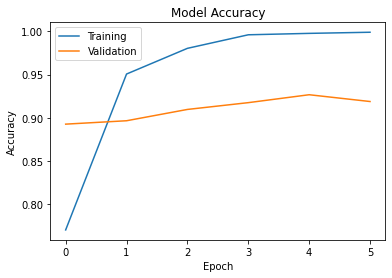

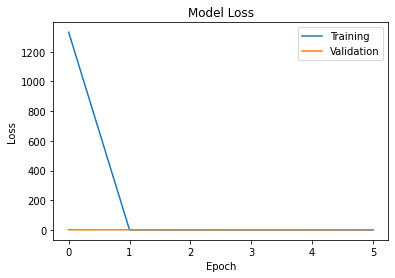

In [94]:
# plot training history
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'])
#plt.show()

accuracy_name = 'train_val_accuracy' + '_' + str(current_time) + '.png'
plt.savefig(accuracy_name)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'])
#plt.show()

loss_name = 'train_val_loss' + '_' + str(current_time) + '.png'
plt.savefig(loss_name)

#3. Evaluation

In [95]:
# Evaluate the model.
acc = (model.evaluate(test_data))[1]

24/24 [==============================] - 10s 294ms/step - loss: 1.1334 - accuracy: 0.9190


##3.1 Create Confusion Matrix

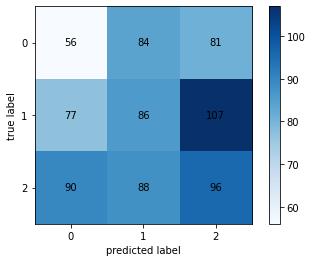

In [96]:
#https://stackoverflow.com/questions/64622210/how-to-plot-confusion-matrix-for-prefetched-dataset-in-tensorflow
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_data)
prediction = tf.argmax(y_pred, axis=1)
ground_truth = tf.concat([y for x, y in test_data], axis=0) # get true labels of test dataset 

lung_conf_matrix = confusion_matrix(prediction, ground_truth)

class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]

#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=lung_conf_matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False)
                                #class_names=class_names) # funktioniert auf kaggle aber nicht auf colab... ersetzt classen indizes mit classen namen

conf_name = 'conf_matrix' + '_' + str(current_time) + '.png'
plt.savefig(conf_name)

##3.2 Save Performance Metrics

In [97]:
%cd {PROJECT_PATH}/training_results

from sklearn import metrics

def print_to_file(summary):
    with open('results.txt','a') as txt_file:
        print(summary, file=txt_file)

with open('results.txt', "a") as txt_file:
    txt_file.write(str(current_time) + '\n')

# save model summary to results.txt
model.summary(print_fn=print_to_file)

with open('results.txt', "a") as txt_file:
    txt_file.write('\nAccuracy: ' + str(round(acc,4)) + '\n' +
                   metrics.classification_report(ground_truth, prediction, digits=3, target_names=class_names) + '\n\n') #https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

#print(metrics.classification_report(ground_truth, prediction, digits=3, target_names=class_names))

/content/drive/MyDrive/Semestermaterial/Master/1.Semester_Master/CV/CV_Projekt/cvproject-main/training_results


#4. Save Model

In [98]:
# Save model as .h5 file.
model.save(f'{MODEL_PATH}/model_{current_time}.h5')

In [99]:


"""
# plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#train data accuracy and loss
#plt.plot(history.history['val_loss'], label = 'training loss')
#plt.plot(history.history['val_accuracy'], label = 'training accuracy')
#plt.legend()
#plt.show()

#test data accuracy and loss
#plt.plot(history.history['loss'], label = 'training loss')
#plt.plot(history.history['accuracy'], label = 'training accuracy')
#plt.legend()

# Save model as .h5 file.
model.save(f'{MODELS_PATH}/model_2021-01-20_{i+1}.h5')

# Delete the data for this model from RAM/GPU/wherever...
#del model
#del history
#K.clear_session()
"""

"\n# plotting training values\nsns.set()\n\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(1, len(loss) + 1)\n\n#accuracy plot\nplt.plot(epochs, acc, color='green', label='Training Accuracy')\nplt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')\nplt.title('Training and Validation Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend()\nplt.figure()\n\n#loss plot\nplt.plot(epochs, loss, color='pink', label='Training Loss')\nplt.plot(epochs, val_loss, color='red', label='Validation Loss')\nplt.title('Training and Validation Loss')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n\n#train data accuracy and loss\n#plt.plot(history.history['val_loss'], label = 'training loss')\n#plt.plot(history.history['val_accuracy'], label = 'training accuracy')\n#plt.legend()\n#plt.show()\n\n#test data accuracy and loss\n#plt.plot(history